# Airbnb Hong Kong EDA
## Data preparation, Feature Understanding
### Object: -to understand how much are the top airbnb earners making in Hong Kong? ( What differenciate them from general Airbnb host?)
- analyze the average price by property type and district using seaborn and statistical method
- to understand the relationship among ratings and booked out days
- target host with bad review for cleaning business
- to understand the relationship among ratings and booked out days
###              target host with bad review for cleaning business
#### data source: http://insideairbnb.com/get-the-data/

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# import warnings
# warnings.simplefilter(action='ignore',category='FutureWarning')

In [4]:
df = pd.read_csv('D:\Dataset\listings.csv')
reviews = pd.read_csv('D:\\Dataset\\reviews.csv')

In [5]:
# pd.set_option('display.max_columns',1000)
# pd.set_option('display.max_rows',1000)
# normally I will set this up for detail exploration. But for making the process short in Github I'll turn it off

In [6]:
df.shape

(6481, 75)

In [7]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [8]:
df.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,51351068,https://www.airbnb.com/rooms/51351068,20230624004931,2023-06-24,previous scrape,Rental unit in Hong Kong · 2 bedrooms · 2 beds...,Flat is very quiet. A/C in each room and livin...,NaN,https://a0.muscache.com/pictures/bfab4a37-9a96...,125138858,...,5.0,5.0,5.0,NaN,f,1,1,0,0,0.05
1,51995972,https://www.airbnb.com/rooms/51995972,20230624004931,2023-06-24,previous scrape,Condo in Tung Wan Beach · Studio · 1 bath,我的旅居面東灣沙灘,NaN,https://a0.muscache.com/pictures/6c99c84e-656e...,109310747,...,2.5,4.5,4.0,NaN,f,35,35,0,0,0.12


In [9]:
df1 = df[['id', 'name',  'description','price', 'property_type', 'room_type',
        'host_id',
        'host_name', 'host_since', 'host_location', 'host_neighbourhood',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 
       'host_listings_count',
       'host_total_listings_count',
       'host_identity_verified',
       'neighbourhood_cleansed', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'latitude',
       'bathrooms_text', 'bedrooms', 'beds',
       'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month','listing_url','last_scraped']].copy()

In [10]:
# check duplication
df1.loc[df1.duplicated()]

,id,name,description,price,property_type,room_type,host_id,host_name,host_since,host_location,...,availability_60,availability_90,availability_365,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_url,last_scraped


In [11]:
new_price = []
for i in range(len(df1)):
    value = df1.loc[i,'price']
    value = value.replace('$','').replace(',','')
    new_price.append(float(value))
df1['price'] = new_price

In [12]:
df1['price']

0       470.0
1       430.0
2       500.0
3       367.0
4       170.0
        ...  
6476    150.0
6477    308.0
6478    299.0
6479    160.0
6480    480.0
Name: price, Length: 6481, dtype: float64

#### since I got the price column and availability_30 ( number of day availability for the next 30 day), I can create a new column to present the number of booked room in next 30 day ( if availability_30 is 10, it means that the next 30 day this room got 20 days booked out which can be the potential revenue for the host at that point ( the day the data scrapped) in next 30 day)
#### I hope I get it right lol 🤣

In [13]:
df1['booked_day_30'] = 30 - df1['availability_30']
df1['next_30days_earning'] = df1['price'] * df1['booked_day_30']

In [14]:
df1.head(2)

,id,name,description,price,property_type,room_type,host_id,host_name,host_since,host_location,...,availability_365,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_url,last_scraped,booked_day_30,next_30days_earning
0,51351068,Rental unit in Hong Kong · 2 bedrooms · 2 beds...,Flat is very quiet. A/C in each room and livin...,470.0,Entire rental unit,Entire home/apt,125138858,Tony,2017-04-10,Hong Kong,...,0,1,1,0,0,0.05,https://www.airbnb.com/rooms/51351068,2023-06-24,30,14100.0
1,51995972,Condo in Tung Wan Beach · Studio · 1 bath,我的旅居面東灣沙灘,430.0,Entire condo,Entire home/apt,109310747,Brenda,2017-01-01,"New Territories, Hong Kong",...,0,35,35,0,0,0.12,https://www.airbnb.com/rooms/51995972,2023-06-24,30,12900.0


In [15]:
df1.info()
# Dtype of each column looks fine

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6481 entries, 0 to 6480
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6481 non-null   int64  
 1   name                                          6481 non-null   object 
 2   description                                   6386 non-null   object 
 3   price                                         6481 non-null   float64
 4   property_type                                 6481 non-null   object 
 5   room_type                                     6481 non-null   object 
 6   host_id                                       6481 non-null   int64  
 7   host_name                                     6481 non-null   object 
 8   host_since                                    6481 non-null   object 
 9   host_location                                 4412 non-null   o

### Feature understanding

### How much are the top airbnb earners making in Hong Kong (based on available_30 to get the potential revenue for the next 30 days)


In [16]:
df1.groupby('host_id')['next_30days_earning'].sum().sort_values(ascending=False).head(10)
# original dataset shows top few earners making MILLION in next 30 days which seems a little off. 
# in other words, either the price for a nigth is extremely high, or the next 30 days are all booked out.

host_id
170381731    2944440.0
56570136     2305645.0
447375511    1924892.0
122131447    1551300.0
1654196       916709.0
221028001     900000.0
6067974       880659.0
46132766      695995.0
24358640      633197.0
198109516     633165.0
Name: next_30days_earning, dtype: float64

In [17]:
df1['price'].describe()
# there is even 150000 for one night! but most of the room are under 1000.

count      6481.000000
mean        800.831816
std        2914.260041
min           0.000000
25%         180.000000
50%         400.000000
75%         800.000000
max      150000.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Price per night distribution')

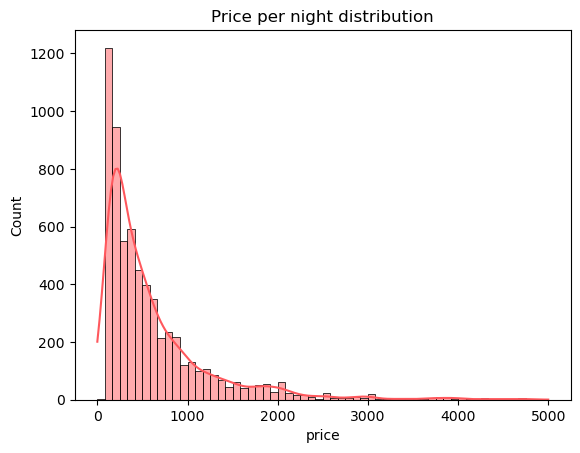

In [18]:
threshold = 5000
sns.histplot(df1[df1['price']<threshold]['price'],kde=True,bins=60,color='#FF585D')
plt.title('Price per night distribution')

In [19]:
# In order to get the better conclusion of top earners, I think the dataset needs to filter a little bit
# First I would like to exclude those room with zero user reviews and NAN rating because I don't expect the top earners don't have a single review or rating
# Second, I tend to remove those room with availability days all zero in both 365 days (which means 'availability_30,availability_60,availability_90,availability_365' all zero)
# Because I don't know how exactly airbnb platform function, but a whole year unavailable seems not normal.
# and I just leave those room with extremely ridiculous price (maybe that just how these top earners do business)

In [20]:
re_earning = df1.dropna(subset = ['review_scores_rating']).copy()

In [21]:
re_earning = re_earning[(re_earning['availability_30']!= 0) & (re_earning['availability_60']!= 0) & (re_earning['availability_90']!= 0) &( re_earning['availability_365']!= 0)]

In [22]:
re_earning.head(2)

,id,name,description,price,property_type,room_type,host_id,host_name,host_since,host_location,...,availability_365,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_url,last_scraped,booked_day_30,next_30days_earning
2,4139784,Home in Sha Tin District · ★4.79 · 1 bedroom ·...,oOo EARTH Room only oOo<br /><br />Set in Shat...,500.0,Private room in home,Private room,15586744,Sven,2014-05-16,Hong Kong,...,365,15,4,11,0,0.14,https://www.airbnb.com/rooms/4139784,2023-06-24,0,0.0
3,9397325,Rental unit in Hong Kong · ★4.56 · 1 bedroom ·...,Ocean Inn is located at the downtown ( Jordan ...,367.0,Private room in rental unit,Private room,48735502,Ocean,2015-11-11,Hong Kong,...,177,3,0,3,0,0.10,https://www.airbnb.com/rooms/9397325,2023-06-24,18,6606.0


In [23]:
top_10_earning = re_earning.groupby('host_id')['next_30days_earning'].sum().sort_values(ascending=False).head(10)

In [24]:
top_10_earning = top_10_earning.reset_index()

In [25]:
top_10_earning
# It would be more clear to get the host_name

,host_id,next_30days_earning
0,56570136,596965.0
1,89343768,315718.0
2,26604877,300000.0
3,14634338,296400.0
4,46132766,267625.0
5,247070196,248225.0
6,21591327,247293.0
7,6067974,208159.0
8,240790745,202106.0
9,26936781,197299.0


In [26]:
top_10_earning_v1 = top_10_earning.merge(re_earning[['host_name','host_id']].drop_duplicates(), on='host_id',how='left')
# .drop_duplicates() to get the unique host_id, host_name
# left join to keep the columns in top_10_earning unchanged for presenting numbers of earning 

In [27]:
top_10_earning_v1

,host_id,next_30days_earning,host_name
0,56570136,596965.0,The Grand Blossom
1,89343768,315718.0,Alice
2,26604877,300000.0,Taylor
3,14634338,296400.0,Rick
4,46132766,267625.0,Jordan
5,247070196,248225.0,Las Vegas
6,21591327,247293.0,Maria
7,6067974,208159.0,Wilson
8,240790745,202106.0,Samson
9,26936781,197299.0,Wing


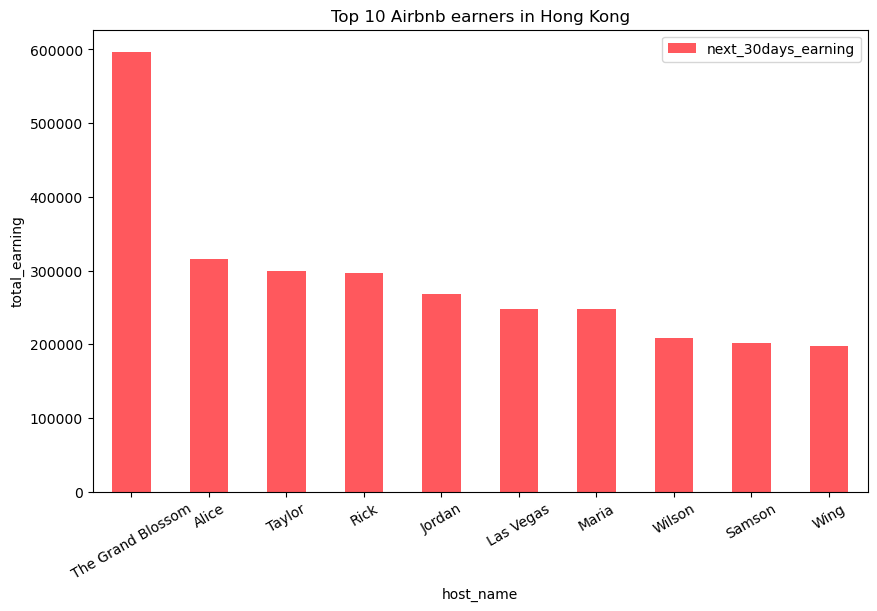

In [28]:
ax = top_10_earning_v1[['host_name','next_30days_earning']].set_index('host_name').plot(kind ='bar',color='#FF585D',figsize=(10,6))
# withou set_index, default x axis is the index of the dataframe
ax.set_title('Top 10 Airbnb earners in Hong Kong')
ax.set_ylabel('total_earning')
plt.xticks(rotation=30)
plt.show()

### For people who want to get in this industry, Top Airbnb earners in Hong Kong make over 200k within 30 days ( start from 2023.6.24 which is the data scrapping date) Though it isn't equal to the average income per month considering factors like travel, weather, vacation, and so on.
#### The Grand Blossom even almost hit 600k which is roughly twice as that of Alice. How he\she can run a sucessful airbnb? It is interested to go deeper analysis

In [29]:
top_10_price_v1 = top_10_earning.merge(re_earning[['host_name','host_id','price','id']].drop_duplicates(), on='host_id',how='inner')
# like we said before, the income basically come from price and numbers of book_out days, so I do the same trick to get the price and room id

In [30]:
top_10_price_v2 = top_10_price_v1[['host_id','host_name','price','id']]
top_10_price_v2

,host_id,host_name,price,id
0,56570136,The Grand Blossom,2057.0,32114288
1,56570136,The Grand Blossom,2057.0,10913704
2,56570136,The Grand Blossom,1857.0,43669409
3,56570136,The Grand Blossom,1686.0,31154958
4,56570136,The Grand Blossom,1737.0,21884932
...,...,...,...,...
95,26936781,Wing,1312.0,5254053
96,26936781,Wing,2486.0,37172099
97,26936781,Wing,1318.0,6098189
98,26936781,Wing,1132.0,5215294


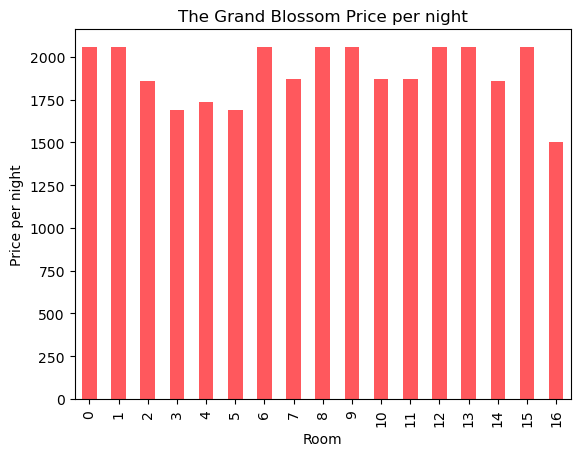

In [31]:
top_10_price_v1[top_10_price_v2['host_name']=='The Grand Blossom']['price'].plot(kind='bar',color='#FF585D')
plt.xlabel('Room')
plt.ylabel('Price per night')
plt.title('The Grand Blossom Price per night')
plt.show()
# remember the distribution of price per night in Hong Kong? Most of the price is under 1000 HKD
# But the number 1 earner 'The Grand Blossom' actually hold various rooms or apartments which price around 1800HKD

In [32]:
# noticed that second and the third earners (Alice, Taylor) have a huge price
df1.query('host_id ==89343768 | host_id ==26604877')
# df1[(df1['host_id'] == 89343768) | (df1['host_id'] == 26604877)] use query() save more time

,id,name,description,price,property_type,room_type,host_id,host_name,host_since,host_location,...,availability_365,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_url,last_scraped,booked_day_30,next_30days_earning
1696,675640309774027291,Villa in Hung Shing Yeh Beach · ★4.86 · 3 bedr...,No ordinary place..... this newly renovated f...,12143.0,Entire villa,Entire home/apt,89343768,Alice,2016-08-11,Hong Kong,...,324,1,1,0,0,2.86,https://www.airbnb.com/rooms/675640309774027291,2023-06-24,26,315718.0
1834,32582301,Rental unit in Hong Kong · ★4.86 · 2 bedrooms ...,"Hong Kong has been our lifelong home, and our ...",150000.0,Entire rental unit,Entire home/apt,26604877,Taylor,2015-01-23,Hong Kong,...,268,1,1,0,0,0.15,https://www.airbnb.com/rooms/32582301,2023-06-24,2,300000.0


#### So I check these two listing url find out that Alice provides a luxury fancy house which totally make sense the price is 12k. But that of Taylor looks normal to me and there is no way it costs 150k per night🤣

In [33]:
top_10_price_v2['price'][top_10_price_v2['host_id']!=26604877].describe()

count       99.000000
mean      1367.252525
std       1222.917692
min        453.000000
25%        777.000000
50%       1200.000000
75%       1857.000000
max      12143.000000
Name: price, dtype: float64

In [34]:
top_10_hostname = top_10_price_v2['host_name'].unique().tolist()

In [35]:
top_10_hostname

['The Grand Blossom',
 'Alice',
 'Taylor',
 'Rick',
 'Jordan',
 'Las Vegas',
 'Maria',
 'Wilson',
 'Samson',
 'Wing']

In [36]:
df1[['host_id','host_name']].value_counts().head(15)

host_id    host_name        
4584648    Ivy                  405
475889596  Jov                  366
7518056    Jovee                365
97240131   Jov                  362
67709885   Choon San            303
138649185  Apac                 150
14861546   Tane Residence       121
498695672  Morgen                93
156409670  Tushita               89
198109516  Apple                 77
122131447  Debe                  69
6067974    Wilson                58
166183091  Pineapple             56
56570136   The Grand Blossom     53
24358640   Janis                 51
dtype: int64


### To summarize, I see two modes of running a business in airbnb. Majority of the top airbnb earners have a average price per night around 1400 which is higher than the average market price. If we see who own the most of rooms\houses for airbnb, only Wilson and The Grand Blossom exist in the top 15 list (58, 53 respectively which are far away from those own hundreds) So it is not necessary that you have to own huge numbers of rooms\ house to blossom in this industry
### The second mode is providing a extremely fancy big house with a relatively much more higher price (like host Alice) 

In [37]:
df1 = df1.drop(1834,axis=0)
# drop the 150k per night row

In [38]:
df1['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [39]:
# There are four types of room in Airbnb, let's see the price distribution among them
# I did the price distribution plot before and it's obvious there are some outliers namely crazy price
# for better visualization, set different ylim to understand the price distribution among these room types

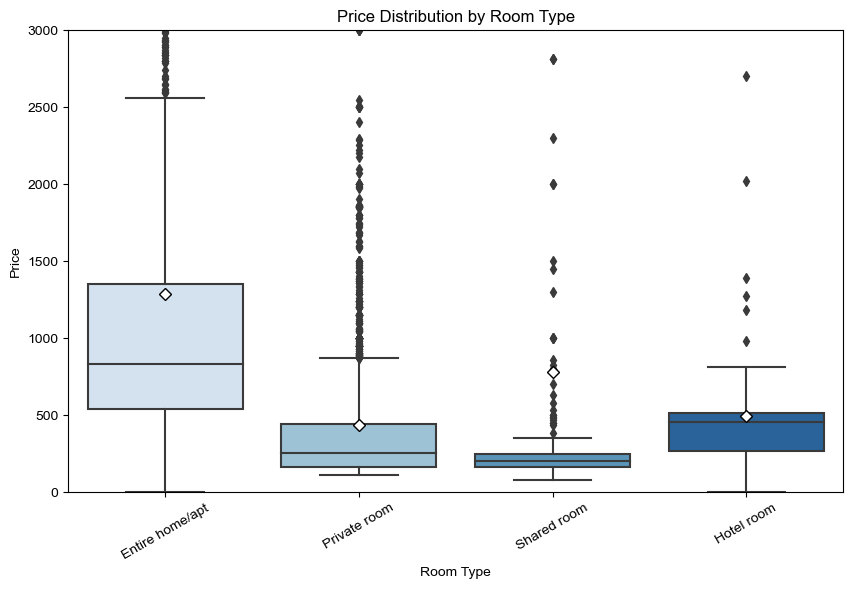

In [40]:
plt.figure(figsize=(10,6))

sns.boxplot(x='room_type',
            y='price',
            data=df1,
            palette='Blues',
            showmeans=True,
           meanprops={'marker':'D',
                      'markerfacecolor':'white',
                     'markeredgecolor':'black'})
sns.set(style="darkgrid")
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')

plt.ylim(0,3000) # zoom in little bit

plt.xticks(rotation=30)
plt.show()


In [41]:
# simply explain, the interquartile present most of the price for a Entire home/apt type room which is range from roughly 500 to 1300
# And the average price is around 1250 HKD. compared with Entire home/apt, the rest have relatively lower price distribution
# shared room has more intense or more concentrated price distribution

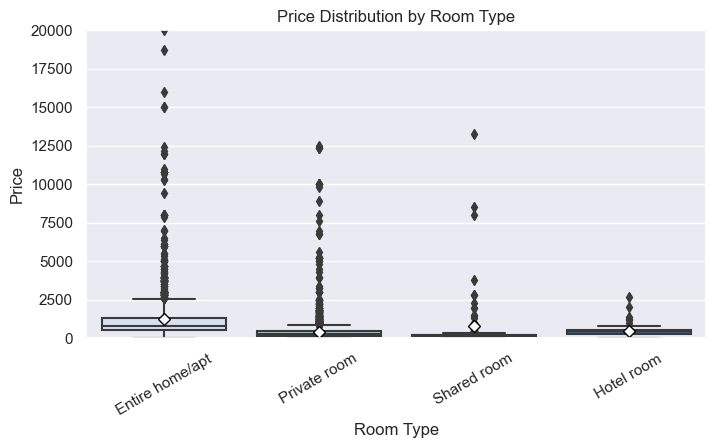

In [42]:
plt.figure(figsize=(8,4))

sns.boxplot(x='room_type',
            y='price',
            data=df1,
            palette='Blues',
            showmeans=True,
           meanprops={'marker':'D',
                      'markerfacecolor':'white',
                     'markeredgecolor':'black'})
sns.set(style="darkgrid")
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')

plt.ylim(0,20000) # zoom in little bit

plt.xticks(rotation=30)
plt.show()

In [43]:
# all of them have outliers which can lead to futher exploration.

In [44]:
# observe rating distribution. drop na first
rating = df1.dropna(subset = ['review_scores_rating']).copy()
rating.head(2)

,id,name,description,price,property_type,room_type,host_id,host_name,host_since,host_location,...,availability_365,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_url,last_scraped,booked_day_30,next_30days_earning
0,51351068,Rental unit in Hong Kong · 2 bedrooms · 2 beds...,Flat is very quiet. A/C in each room and livin...,470.0,Entire rental unit,Entire home/apt,125138858,Tony,2017-04-10,Hong Kong,...,0,1,1,0,0,0.05,https://www.airbnb.com/rooms/51351068,2023-06-24,30,14100.0
1,51995972,Condo in Tung Wan Beach · Studio · 1 bath,我的旅居面東灣沙灘,430.0,Entire condo,Entire home/apt,109310747,Brenda,2017-01-01,"New Territories, Hong Kong",...,0,35,35,0,0,0.12,https://www.airbnb.com/rooms/51995972,2023-06-24,30,12900.0


Text(0.5, 1.0, 'Distribution of Ratings')

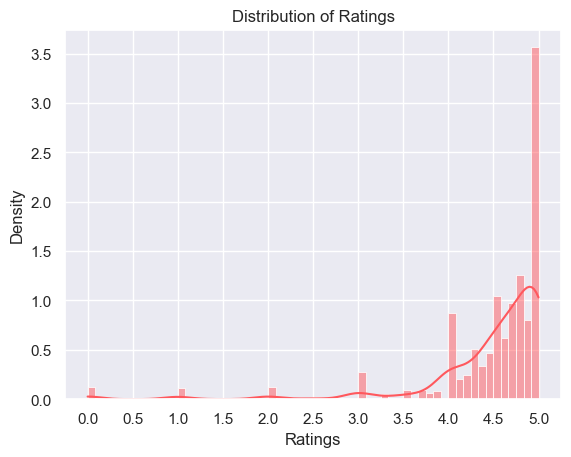

In [45]:

sns.histplot(rating['review_scores_rating'],kde=True,bins=60,stat='density',color='#FF585D')

plt.xticks([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]) # Set the desired x-axis ticksb

plt.xlabel('Ratings')
plt.title('Distribution of Ratings')

### Most of the Ratings are between 4 and 5

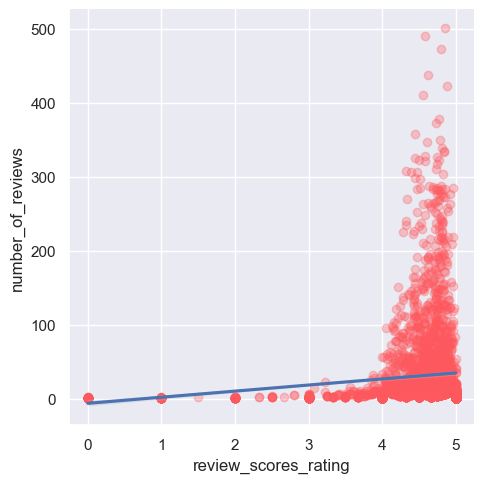

In [46]:
# Is there any relationship between rating and number of reviews?
sns.lmplot(x='review_scores_rating',y='number_of_reviews',data=rating,scatter_kws={'color':'#FF585D','alpha':0.3})
plt.show()
# correlation is not obvious, but we can see most of the ratings are between 4 and 5. And most of the numbers of reviews below 100

In [47]:
rating['neighbourhood_cleansed'].unique()

array(['Wan Chai', 'Islands', 'Sha Tin', 'Yau Tsim Mong', 'Sham Shui Po',
       'Central & Western', 'Kowloon City', 'Eastern', 'Tuen Mun',
       'Southern', 'Yuen Long', 'Sai Kung', 'Tsuen Wan', 'Wong Tai Sin',
       'North', 'Tai Po', 'Kwun Tong', 'Kwai Tsing'], dtype=object)

In [48]:
# we got a few location. let's use groupby to get the avg price by location
# now we have a few dataframe, let me make it clear.
# df1: drop some columns from original dataframe, and drop one outlier 150k per night row
# rating: drop na in column review_rating_score
# re_earning: drop na in column review_rating_score, remove rows are all 0 value in columns (number_of_review, availablity_30,60,90,365)

In [49]:
# remember I only exclude one outlier that price 150k, but I'm still not sure whether other rooms with huge price are reasonable or not.
# so this series may not tell the true story.
# again, I need to filter out some rows,first remove rows are all 0 value in columns (availablity_30,60,90,365)
# I think we can agree on that, but this time I will keep the zero number of review, and NAN rating becasue those rooms require crazy price normally have few numbers of booking

In [50]:
filter_rows = df1[(df1['availability_30']!= 0) & (df1['availability_60']!= 0) & (df1['availability_90']!= 0) &( df1['availability_365']!= 0)].copy()

In [51]:
filter_rows.head(2)

,id,name,description,price,property_type,room_type,host_id,host_name,host_since,host_location,...,availability_365,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_url,last_scraped,booked_day_30,next_30days_earning
2,4139784,Home in Sha Tin District · ★4.79 · 1 bedroom ·...,oOo EARTH Room only oOo<br /><br />Set in Shat...,500.0,Private room in home,Private room,15586744,Sven,2014-05-16,Hong Kong,...,365,15,4,11,0,0.14,https://www.airbnb.com/rooms/4139784,2023-06-24,0,0.0
3,9397325,Rental unit in Hong Kong · ★4.56 · 1 bedroom ·...,Ocean Inn is located at the downtown ( Jordan ...,367.0,Private room in rental unit,Private room,48735502,Ocean,2015-11-11,Hong Kong,...,177,3,0,3,0,0.10,https://www.airbnb.com/rooms/9397325,2023-06-24,18,6606.0


In [52]:
filter_rows[filter_rows['price']>10000]
# got you!index 3748,1222 which are shared room tag 50000HKD, 13250HKD

,id,name,description,price,property_type,room_type,host_id,host_name,host_since,host_location,...,availability_365,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_url,last_scraped,booked_day_30,next_30days_earning
143,828335873143949605,Rental unit in Hong Kong · 1 bedroom · 1 bed ·...,"Large 3,840 square feet unit with sweeping oce...",15000.0,Entire rental unit,Entire home/apt,2020398,Jeannie,2012-03-27,"Los Angeles, CA",...,364,1,1,0,0,NaN,https://www.airbnb.com/rooms/828335873143949605,2023-06-24,1,15000.0
215,571999270476425993,Villa in Hong Kong · 6 bedrooms · 6 beds · 8 b...,Rent this luxury house located in a quiet area...,32000.0,Entire villa,Entire home/apt,380621393,ECrent Worldwide Company,2020-12-17,NaN,...,365,8,3,5,0,NaN,https://www.airbnb.com/rooms/571999270476425993,2023-06-24,0,0.0
598,34912428,Rental unit in Hong Kong · ★4.67 · 2 bedrooms ...,COMFORT AND CONVENIENCE RIGHT IN THE HEART OF ...,10768.0,Entire rental unit,Entire home/apt,263126426,Emma,2019-05-21,NaN,...,365,1,1,0,0,0.06,https://www.airbnb.com/rooms/34912428,2023-06-24,0,0.0
805,24899594,Rental unit in Hong Kong · ★4.64 · Studio · 1 ...,This is THE APARTMENT you are looking for if y...,10643.0,Entire rental unit,Entire home/apt,188259898,Farhaz,2018-05-07,NaN,...,365,1,1,0,0,0.37,https://www.airbnb.com/rooms/24899594,2023-06-24,0,0.0
1222,39802990,Rental unit in Hong Kong · 1 bedroom · 1 bed ·...,A furnished room in a two-room unit with a fur...,13250.0,Shared room in rental unit,Shared room,95577389,Iris,2016-09-17,NaN,...,89,1,0,0,1,NaN,https://www.airbnb.com/rooms/39802990,2023-06-24,1,13250.0
1535,47182436,Villa in Hong Kong · 6 bedrooms · 6 beds · 8 b...,Rent this luxury house located in a quiet area...,32000.0,Entire villa,Entire home/apt,380621393,ECrent Worldwide Company,2020-12-17,NaN,...,365,8,3,5,0,0.03,https://www.airbnb.com/rooms/47182436,2023-06-24,0,0.0
1563,49841293,Home in Hong Kong · ★5.0 · 5 bedrooms · 4 beds...,"Day rental for shooting (TV, photo, etc only) ...",15000.0,Entire home,Entire home/apt,17061670,Steve&Jenya,2014-06-21,Hong Kong,...,364,1,1,0,0,0.17,https://www.airbnb.com/rooms/49841293,2023-06-24,1,15000.0
1608,52432066,Condo in Hong Kong · 1 bedroom · 1.5 baths,Enjoy a luxury experience at this centrally-lo...,18714.0,Entire condo,Entire home/apt,55002064,Kalai,2016-01-17,Hong Kong,...,365,1,1,0,0,NaN,https://www.airbnb.com/rooms/52432066,2023-06-24,0,0.0
1679,650168395680255348,Villa in Hong Kong · 6 bedrooms · 6 beds · 8 b...,这栋豪华房子位于安静的地区，靠近著名的金色海滩。这栋独立别墅设有6间卧室，设有宽敞的私人花园...,32000.0,Entire villa,Entire home/apt,380621393,ECrent Worldwide Company,2020-12-17,NaN,...,365,8,3,5,0,0.09,https://www.airbnb.com/rooms/650168395680255348,2023-06-24,0,0.0
1696,675640309774027291,Villa in Hung Shing Yeh Beach · ★4.86 · 3 bedr...,No ordinary place..... this newly renovated f...,12143.0,Entire villa,Entire home/apt,89343768,Alice,2016-08-11,Hong Kong,...,324,1,1,0,0,2.86,https://www.airbnb.com/rooms/675640309774027291,2023-06-24,26,315718.0


In [53]:
filter_rows = filter_rows.drop(3748,axis=0)
filter_rows = filter_rows.drop(1222,axis=0)
# after filtering out some outliers and unvalid rows, let's aggregate again

In [54]:
avg_price_location_v1 = filter_rows.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).head(30)
avg_price_location_v1
# include outliers (those cost like 30k,50k per night)

neighbourhood_cleansed
Tsuen Wan            8579.555556
Tuen Mun             5025.966667
Sai Kung             1789.315068
Wong Tai Sin         1482.750000
Kwai Tsing           1451.000000
Yuen Long            1420.187500
Islands              1300.992395
Tai Po               1226.714286
Southern             1197.936508
Kwun Tong            1057.809524
Sha Tin               952.791667
North                 931.272727
Central & Western     807.303590
Eastern               678.383178
Yau Tsim Mong         534.234915
Wan Chai              504.449070
Kowloon City          497.418605
Sham Shui Po          364.807143
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

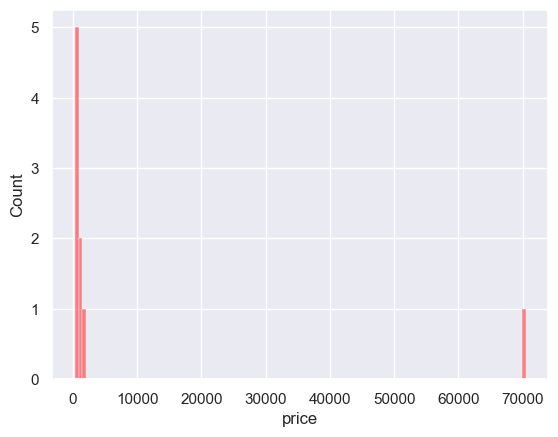

In [55]:
sns.histplot(filter_rows[filter_rows['neighbourhood_cleansed']=='Tsuen Wan']['price'],color='#FF585D')
# one luxury house can actually effect the average price in 'Tsuen Wan' area especially there are only few rooms available.
# In 'Tsuen Wan', only 9 rooms information, 8 out of 9 price way below 10000, but one price 70k

In [56]:
# Identify the outliers in the dataset by using interquartile range method (IQR)

In [57]:
Q1 = filter_rows['price'].quantile(0.25)
Q3 = filter_rows['price'].quantile(0.75)
IQR = Q3 - Q1

In [58]:
print(Q1,Q3,IQR)

180.0 700.0 520.0


In [59]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound,upper_bound)
# anything greater than lower bound and lower than upper bound won't consider as outliers
# since price is not gonna be lower than 0, outliers are those upper than upper bound

-600.0 1480.0


In [60]:
outliers = filter_rows[filter_rows['price'] > upper_bound]

In [61]:
without_outliers = filter_rows[(filter_rows['price']>=lower_bound) & (filter_rows['price']<=upper_bound)]

In [62]:
(len(without_outliers)/len(filter_rows))*100

91.41828365673135

In [63]:
# exclude outliers
avg_price_location_v1 = without_outliers.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).head(30)
avg_price_location_v1

neighbourhood_cleansed
Kwai Tsing           1451.000000
Islands               793.309179
Tai Po                744.764706
Tsuen Wan             678.142857
Sai Kung              582.319149
Yuen Long             574.583333
Kwun Tong             542.500000
Tuen Mun              537.466667
Sha Tin               515.956522
Central & Western     462.969388
North                 424.400000
Yau Tsim Mong         416.997523
Wan Chai              382.572897
Eastern               380.927461
Sham Shui Po          333.137681
Kowloon City          300.520833
Wong Tai Sin          300.000000
Southern              264.849057
Name: price, dtype: float64

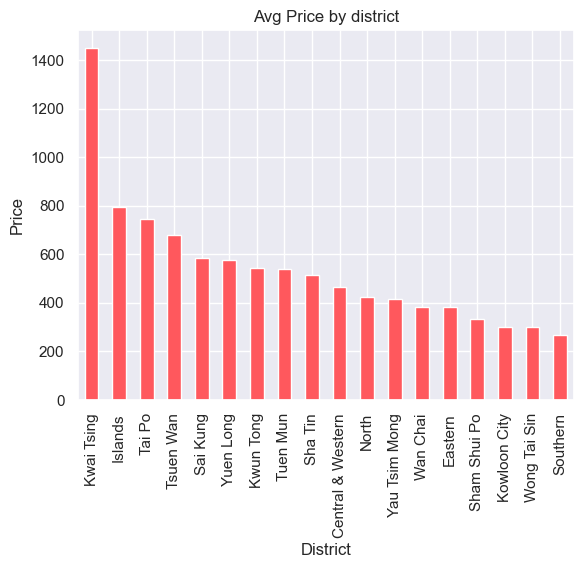

In [64]:
avg_price_location_v1.plot(kind='bar',color='#FF585D')

plt.title('Avg Price by district')
plt.xlabel('District')
plt.ylabel('Price')

plt.show()

### Average Price by District  (using IQR method)

In [65]:
# How about those outliers? there is nothing wrong about the data itself
# Here is what I am gonna use Segment analysis
# Like i said, 10k per night is valid but will effect the average 
# First I need to define threshold to sperate those luxury property and general property
# Because of majority price of room is below 3000, let's suggest room with price over 10000 is condiser as luxury

In [66]:
luxury_threshold = 10000
filter_rows['property_type'] = filter_rows['price'].apply(lambda x: 'Luxury' if x > luxury_threshold else 'General')

In [67]:
filter_rows.head(2)

,id,name,description,price,property_type,room_type,host_id,host_name,host_since,host_location,...,availability_365,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_url,last_scraped,booked_day_30,next_30days_earning
2,4139784,Home in Sha Tin District · ★4.79 · 1 bedroom ·...,oOo EARTH Room only oOo<br /><br />Set in Shat...,500.0,General,Private room,15586744,Sven,2014-05-16,Hong Kong,...,365,15,4,11,0,0.14,https://www.airbnb.com/rooms/4139784,2023-06-24,0,0.0
3,9397325,Rental unit in Hong Kong · ★4.56 · 1 bedroom ·...,Ocean Inn is located at the downtown ( Jordan ...,367.0,General,Private room,48735502,Ocean,2015-11-11,Hong Kong,...,177,3,0,3,0,0.10,https://www.airbnb.com/rooms/9397325,2023-06-24,18,6606.0


In [68]:
avg_price_by_property = filter_rows.groupby(['neighbourhood_cleansed','property_type'])['price'].mean().unstack()
avg_price_by_property

property_type,General,Luxury
neighbourhood_cleansed,,
Central & Western,628.944099,19951.222222
Eastern,611.145540,15000.000000
Islands,1073.428571,16035.750000
Kowloon City,497.418605,NaN
Kwai Tsing,1451.000000,NaN
Kwun Tong,1057.809524,NaN
North,931.272727,NaN
Sai Kung,1349.577465,17400.000000
Sha Tin,515.956522,11000.000000


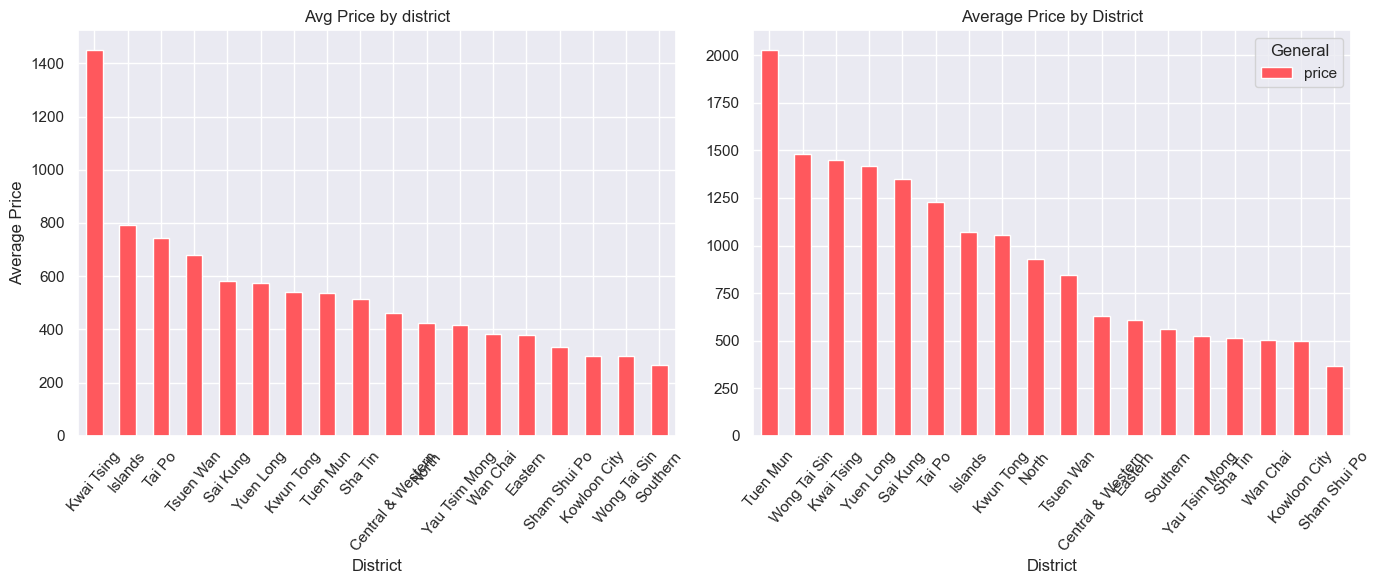

In [69]:
fig, axes = plt.subplots(nrows = 1, ncols =2, figsize=(14,6))

avg_price_location_v1.plot(kind='bar',color='#FF585D',ax=axes[0])
axes[0].set_title('Avg Price by district')
axes[0].set_xlabel('District')
axes[0].set_ylabel('Average Price')

axes[0].tick_params(axis='x',rotation=50)

general = filter_rows[filter_rows['property_type']=='General'] \
            .groupby('neighbourhood_cleansed')['price'] \
            .mean().sort_values(ascending=False).head(30) \
            .plot(kind='bar',color='#FF585D',ax=axes[1])
axes[1].set_title('Average Price by District')
axes[1].set_xlabel('District')
# axes[1].set_ylabel('Average Price')
axes[1].legend(title='General')
axes[1].tick_params(axis='x',rotation=50)
plt.tight_layout() # Adjust spacing between subplots
plt.show()

### Left plot is the Average Price by District  (using IQR method) and right plot is the Average Price by District and property type is General (exclude those price over 10k), there is a slightly difference. first one actually exclude those price over 1480HKD (Q3+1.5 * IQR) which are considered as outliers statistically. the second one include those price under 10k. So generally, average price on right hand side is more higher than that in left.

### There is only one room in Kwai Tsing district cost 1451 HKD. That is why it so stands out among other districts

In [70]:
filter_rows[filter_rows['neighbourhood_cleansed']=='Islands']['price'].describe()

count      263.000000
mean      1300.992395
std       2065.792541
min        243.000000
25%        618.500000
50%        880.000000
75%       1300.000000
max      25000.000000
Name: price, dtype: float64

In [71]:
filter_rows[filter_rows['neighbourhood_cleansed']=='Kwai Tsing']

,id,name,description,price,property_type,room_type,host_id,host_name,host_since,host_location,...,availability_365,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_url,last_scraped,booked_day_30,next_30days_earning
5168,561965781549228921,Condo in Hong Kong · ★4.95 · 2 bedrooms · 3 be...,Located on top of Tsing Yi Station & Maritime ...,1451.0,General,Entire home/apt,163124554,Wilson,2017-12-18,Hong Kong,...,178,2,2,0,0,1.63,https://www.airbnb.com/rooms/561965781549228921,2023-06-24,24,34824.0


In [72]:
# general = filter_rows[filter_rows['property_type']=='General'] \
#             .groupby('neighbourhood_cleansed')['price'] \
#             .mean().sort_values(ascending=False).head(30) \
#             .plot(kind='bar',color='#FF585D')
# plt.title('Average Price by District')
# plt.xlabel('District')
# plt.ylabel('Average Price')
# plt.legend(title='General')
# plt.show()

In [73]:
sorted_neighborhoods = filter_rows[filter_rows['property_type']=='General'].groupby('neighbourhood_cleansed')['price'] \
                                .mean().sort_values(ascending=False).index

In [74]:
sorted_avg_price_byproperty = avg_price_by_property.loc[sorted_neighborhoods]

In [75]:
sorted_avg_price_byproperty

property_type,General,Luxury
neighbourhood_cleansed,,
Tuen Mun,2028.851852,32000.000000
Wong Tai Sin,1482.750000,NaN
Kwai Tsing,1451.000000,NaN
Yuen Long,1420.187500,NaN
Sai Kung,1349.577465,17400.000000
Tai Po,1226.714286,NaN
Islands,1073.428571,16035.750000
Kwun Tong,1057.809524,NaN
North,931.272727,NaN


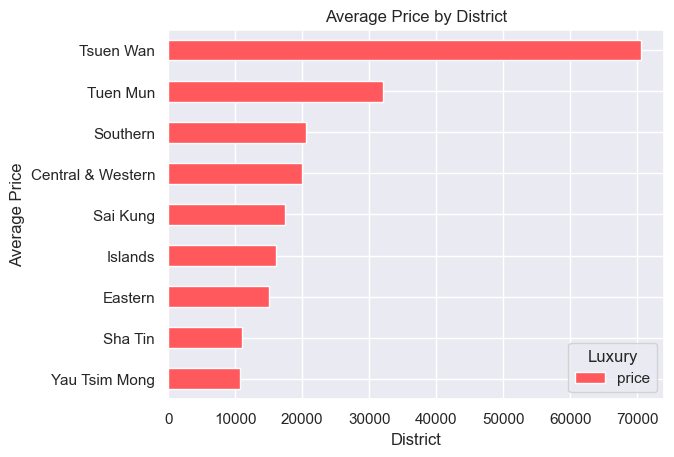

In [76]:
filter_rows[filter_rows['property_type']=='Luxury'] \
                .groupby('neighbourhood_cleansed')['price'] \
                .mean().sort_values(ascending=True).head(30) \
                .plot(kind='barh',color='#FF585D')
plt.title('Average Price by District')
plt.xlabel('District')
plt.ylabel('Average Price')
plt.legend(title='Luxury')
plt.show()

### Average Price by District and property type is Luxury ( price over 10k)

In [77]:
# hexbin_plot = sns.jointplot(x='review_scores_rating',y='booked_day_30',
#               kind='hex',data=re_earning[re_earning['booked_day_30'] <= 10],
#               cmap="RdPu",marginal_kws={'color': '#FF585D'})

# sns.regplot(x='review_scores_rating', y='booked_day_30', 
#             data=re_earning[re_earning['booked_day_30'] <= 10], scatter=False, 
#             ax=hexbin_plot.ax_joint, color='#FF585D')

### Is there any relationship between good review rating and the days of booked out?
### my hypothesis is the higher the rating, the more the days booked out in next 30 days

<Axes: xlabel='review_scores_rating', ylabel='booked_day_30'>

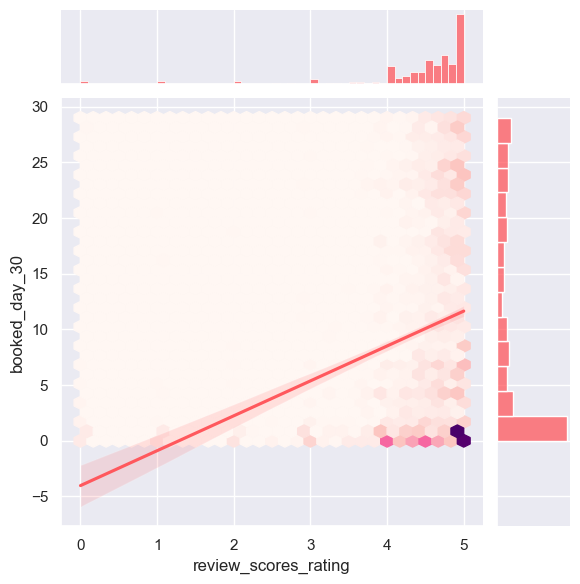

In [78]:
hexbin_plot = sns.jointplot(x='review_scores_rating',y='booked_day_30',
              kind='hex',data=re_earning,
              cmap="RdPu",marginal_kws={'color': '#FF585D'})

sns.regplot(x='review_scores_rating', y='booked_day_30', 
            data=re_earning, scatter=False, 
            ax=hexbin_plot.ax_joint, color='#FF585D')

In [79]:
import statsmodels.api as sm

In [80]:
x= re_earning['review_scores_rating']
y= re_earning['booked_day_30']

x= sm.add_constant(x)
model = sm.OLS(y,x).fit()

In [81]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          booked_day_30   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     143.3
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           4.83e-32
Time:                        21:43:21   Log-Likelihood:                -8137.7
No. Observations:                2211   AIC:                         1.628e+04
Df Residuals:                    2209   BIC:                         1.629e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.0248 

### The review of rating coefficient is statistically significant, combined with the plot above. There is a positive relationship between rating and booked out days. But don't forget to consider the practical significance since the maximum of rating is 5 and the days booked out in next 30 days is obviously under 30. So a unit increase in rating is not necessarily correspond to a full 3.1344-unit increase in booked out day

In [82]:
re_earning = re_earning.dropna(subset = ['host_response_rate'])

In [83]:
re_earning['host_response_rate'] = re_earning['host_response_rate'].str.replace('%','').astype(float)/100
# 设置了关闭future warning 似乎跟str.replace 冲突了
# warnings.simplefilter(action='ignore',category='FutureWarning')
# issubclass() arg 2 must be a class, a tuple of classes, or a union

In [84]:
# def clean_rate(rate):
#     return float(rate.replace('%',''))/100
# df1['host_response_rate'] = df1['host_response_rate'].apply(clean_rate)
# if still choose to suppress futurewarning, try use def to do the same work.

In [85]:
# re_earning.groupby('host_id')['host_response_rate'].mean().sort_values(ascending=False).head(10)

### Reviews exploratory
#### here is another dataset about user reviews, basically I would like to match these reviews to host so I can observe the reviews about those rooms under specify host.
#### From user perspective, what I'm interested in is the environment like cleanness and noisiness. I assume that would be the major contents users complain about. 
#### From host perspective, cleanness and noisiness might be the problem they need to tackle for better services. And for business insight, those hosts who have a issue with these problem may need some sort of support, like outsourcing and looking for man do the cleaning and noise suppression.

In [86]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95463 entries, 0 to 95462
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     95463 non-null  int64 
 1   id             95463 non-null  int64 
 2   date           95463 non-null  object
 3   reviewer_id    95463 non-null  int64 
 4   reviewer_name  95463 non-null  object
 5   comments       95451 non-null  object
dtypes: int64(3), object(3)
memory usage: 4.4+ MB


In [87]:
reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,17891,37352,2010-04-23,76132,Tamara,The apartment on Holly wood Rd was exactly as ...
1,17891,56688,2010-06-24,97136,Wendy,"Apartment was perfect - stylish, spacious and..."


In [88]:
df1[df1['id']==17891].head()
# listing_id in reviews dataframe stands for the room id in df1

,id,name,description,price,property_type,room_type,host_id,host_name,host_since,host_location,...,availability_365,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_url,last_scraped,booked_day_30,next_30days_earning
5401,17891,Rental unit in Hong Kong Island · ★4.76 · Stud...,"Gorgeous and spacious loft, in the best locati...",1400.0,Entire rental unit,Entire home/apt,69063,Candace,2010-01-09,"Los Angeles, CA",...,0,1,1,0,0,0.46,https://www.airbnb.com/rooms/17891,2023-06-24,30,42000.0


In [89]:
df2 = df1[['id','host_name']]
df2
# room id and the host_name. Like I said before, each host can own multiple rooms (id)

,id,host_name
0,51351068,Tony
1,51995972,Brenda
2,4139784,Sven
3,9397325,Ocean
4,5159313,Pan
...,...,...
6476,30484205,Rosvi
6477,29719715,Ken
6478,28270585,Juliet
6479,30488291,Ivy


In [90]:
df2 = pd.merge(df2, reviews, left_on='id',right_on='listing_id')

In [91]:
df2.head(5)
# by merging two dataframe, now I get a new dataframe with information of host_name and the reviews,
# for further exploration

,id_x,host_name,listing_id,id_y,date,reviewer_id,reviewer_name,comments
0,51351068,Tony,51351068,470569309325724351,2021-10-11,46546663,Basy,Tony has been a very communicative ans helpful...
1,51995972,Brenda,51995972,561892856620709159,2022-02-14,444807935,Joseph Y,Room is dirty. View is fabulous. I think the p...
2,51995972,Brenda,51995972,773581795526610448,2022-12-03,343605710,嘉琳,ok ge
3,4139784,Sven,4139784,23068113,2014-11-22,2221926,Shauvik,Sven is an awesome guy! He made sure that ever...
4,4139784,Sven,4139784,26303514,2015-02-09,839358,Eunice,It was really nice of Sven to meet me at the S...


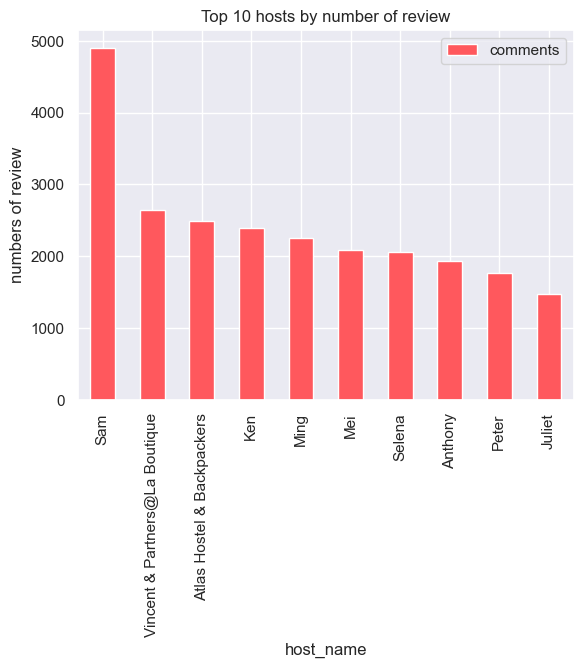

In [92]:
df2[['host_name','comments']].groupby(['host_name']) \
                .count().sort_values(by='comments',ascending=False).head(10).plot(kind ='bar',color='#FF585D')
plt.ylabel('numbers of review')
plt.title('Top 10 hosts by number of review')
plt.show()

In [93]:
# df2[['host_name','listing_id','comments']].head(1000)
# most of the comments composed by English and Chinese users

In [94]:
# to view the whole text of comments
pd.set_option('display.max_colwidth',None)

In [95]:
df2['comments'] = df2['comments'].fillna('')

In [96]:
df2.isnull().sum()

id_x             0
host_name        0
listing_id       0
id_y             0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [97]:
dirty_list = df2['host_name'][(df2['comments'].str.contains('dirty')) |
                 (df2['comments'].str.contains('messy')) |
                (df2['comments'].str.contains('dirt'))   |
                (df2['comments'].str.contains('不干净')) |
                 (df2['comments'].str.contains('点脏'))
                ] \
            .value_counts().head(10)
# without parameter na=False it would be an error to tackle this by using fillna
# count the numbers of reviews contain word 'dirty' for those host

In [98]:
dirty_list= dirty_list.reset_index()
dirty_list.rename(columns={'index':'host_name','host_name':'numbers of review'},inplace=True)

In [99]:
dirty_list

,host_name,numbers of review
0,Nuts,23
1,Brendan,18
2,Brenda,17
3,Peter,15
4,Atlas Hostel & Backpackers,14
5,Selena,14
6,Larin,12
7,Ken,11
8,Sam,10
9,Jojo,10


In [100]:
print('Host with numbers of reviews for cleanness')
print()
for index, row in dirty_list.iterrows():
    host_name = row['host_name']
    num_reviews = row['numbers of review']
    print(f"The host {host_name} has {num_reviews} reviews mentioned 'dirty'")

Host with numbers of reviews for cleanness

The host Nuts has 23 reviews mentioned 'dirty'
The host Brendan has 18 reviews mentioned 'dirty'
The host Brenda has 17 reviews mentioned 'dirty'
The host Peter has 15 reviews mentioned 'dirty'
The host Atlas Hostel & Backpackers has 14 reviews mentioned 'dirty'
The host Selena has 14 reviews mentioned 'dirty'
The host Larin has 12 reviews mentioned 'dirty'
The host Ken has 11 reviews mentioned 'dirty'
The host Sam has 10 reviews mentioned 'dirty'
The host Jojo has 10 reviews mentioned 'dirty'


### If I start a cleaning business, I can choose to reach out these hosts first since they got more complain about cleanness😁

In [101]:
df2[df2['host_name']=='Nuts'].loc[(df2['comments'].str.contains('dirty')) |
                 (df2['comments'].str.contains('messy')) |
                (df2['comments'].str.contains('dirt'))   |
                (df2['comments'].str.contains('不干净')) |
                 (df2['comments'].str.contains('点脏'))
                ].head(2)
# the second chunk use loc to suppress warning which would remind you the index of the boolean mask is not in the same order as the index of the dataframe it is filtering
# https://stackoverflow.com/questions/41710789/boolean-series-key-will-be-reindexed-to-match-dataframe-index

,id_x,host_name,listing_id,id_y,date,reviewer_id,reviewer_name,comments
6506,6994176,Nuts,6994176,122972578,2016-12-26,21505700,Esther,Great location and close to mtr however the bathroom was bit dirty! Room is small but good enough for travellers. Only one roll of toilet paper was provided for a three day stay.
6507,6994176,Nuts,6994176,127108845,2017-01-15,107011673,Perrin,"The room was a little dirty and 2 things to note when showering; do not use their showerhead at full blast to avoid running out of hot water AND test out the water temperature first because it could get scalding hot. Apart from these, it was a pleasant 5D4N stay at Nuts :)<br/> The host was very responsive. Location was great (lively neighbourhood), its near the MTR, easy to locate and secured. Furthermore, plenty of food and shops could be found around the area, including supermarket and convenience store. The space was larger than expected and sufficient for 2 adults. But then again, space wasn't a concern for us since we were out most of the time. :)<br/>"


In [102]:
noisy_list = df2['host_name'][(df2['comments'].str.contains('noise')) |
                 (df2['comments'].str.contains('noisy')) |
                (df2['comments'].str.contains('很多噪音'))|
                 (df2['comments'].str.contains('有点吵')) |
                 (df2['comments'].str.contains('隔音差'))
                ] \
            .value_counts().head(10)

In [103]:
noisy_list = noisy_list.reset_index()
noisy_list

,index,host_name
0,Sam,105
1,Kei,80
2,Ming,44
3,Brendan,44
4,Nuts,39
5,Atlas Hostel & Backpackers,33
6,Peter,33
7,Anthony,32
8,Lulu,32
9,Selena,31


In [104]:
noisy_list.rename(columns={'index':'host_name','host_name':'numbers of review'},inplace=True)

In [105]:
print('Host with numbers of reviews for noise')
print()
for index, row in noisy_list.iterrows():
    host_name = row['host_name']
    num_reviews = row['numbers of review']
    print(f"The host {host_name} has {num_reviews} reviews about noise")

Host with numbers of reviews for noise

The host Sam has 105 reviews about noise
The host Kei has 80 reviews about noise
The host Ming has 44 reviews about noise
The host Brendan has 44 reviews about noise
The host Nuts has 39 reviews about noise
The host Atlas Hostel & Backpackers has 33 reviews about noise
The host Peter has 33 reviews about noise
The host Anthony has 32 reviews about noise
The host Lulu has 32 reviews about noise
The host Selena has 31 reviews about noise


### These hosts might need to do something about the noise. Try some set up within the room to suppress the noise for better user experience

In [106]:
df2[df2['host_name']=='Sam'].loc[(df2['comments'].str.contains('noise')) |
                 (df2['comments'].str.contains('noisy')) |
                (df2['comments'].str.contains('很多噪音'))|
                 (df2['comments'].str.contains('有点吵'))  |
                 (df2['comments'].str.contains('隔音差'))].head(2)

,id_x,host_name,listing_id,id_y,date,reviewer_id,reviewer_name,comments
1867,10099218,Sam,10099218,860484223719097920,2023-04-02,172206165,Bryan,"For one person with minimal luggage for a single night, this was a convenient stay. It's main redeeming points are that it is cheap, and close to Tsim Sha Tsui. The bathroom is separate to the room (not completely private or self-contained), and the room is tiny (no room beside the bed and barely any standing room between the end of the bed and the door). The building is unpleasant (but probably typical of a HK apartment building). Somewhat noisy at night."
2970,862528076748291955,Sam,862528076748291955,906950059458344323,2023-06-05,178972850,Chun-Yu,Wi-if could be better for TV.<br/>And it might be a little noise if it is raining.


### The whole dataset actually contains more information, the exploratory can go hours and hours. I hope this project can generate more insights for those who concerns and be useful for my practicing😁